In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.patches import Polygon
import shapefile
from ipywidgets import interact
from matplotlib.collections import LineCollection
from matplotlib import cm,colors
import matplotlib as mpl
import get_heatmap_matrix as mt

### Prepare data

In [3]:
r = shapefile.Reader("USA_adm_shp/USA_adm1.shp")
shapes = r.shapes()
records = r.records()
state=[i[4] for i in records]

In [8]:
def get_data(year):
    data=mt.heatmap_disease_matrix('MUMPS').ix[year]
    num_records=[data[i.upper()] if i.upper() in data.index else 0 for i in state] # to keep in the form of 
    max_num=np.max(num_records)
    std_num_records=[i/max_num if max_num!=0 else 0 for i in num_records] #tho it is only a list. it should follow the order of states in shaps file
    return std_num_records

In [34]:
get_data('MUMPS',1988)

[0.037209302325581395,
 0.03255813953488372,
 0.03255813953488372,
 0.32790697674418606,
 0.12558139534883722,
 1.0,
 0.076744186046511634,
 0.0,
 0.0023255813953488372,
 0.66046511627906979,
 0.079069767441860464,
 0.086046511627906982,
 0.03255813953488372,
 0.023255813953488372,
 0.35581395348837208,
 0.18604651162790697,
 0.090697674418604657,
 0.48604651162790696,
 0.42093023255813955,
 0.77441860465116275,
 0.0,
 0.413953488372093,
 0.037209302325581395,
 0.53720930232558139,
 0.0023255813953488372,
 0.0,
 0.097674418604651161,
 0.0046511627906976744,
 0.025581395348837209,
 0.046511627906976744,
 0.24883720930232558,
 0.10232558139534884,
 0.0,
 0.0,
 0.12093023255813953,
 0.0,
 0.33488372093023255,
 0.48604651162790696,
 0.0,
 0.23488372093023255,
 0.0,
 0.020930232558139535,
 0.0023255813953488372,
 0.50930232558139532,
 0.68372093023255809,
 0.01627906976744186,
 0.011627906976744186,
 0.32093023255813952,
 0.10465116279069768,
 0.039534883720930232,
 0.0093023255813953487,
 

In [ ]:
def get_disease(disease):
    plot_map(disease)
    #写一个set global的disease

In [4]:
def plot_map(year):
    mpl.rcParams['font.size'] = 10.
    mpl.rcParams['font.family'] = 'Comic Sans MS'
    mpl.rcParams['axes.labelsize'] = 8.
    mpl.rcParams['xtick.labelsize'] = 6.
    mpl.rcParams['ytick.labelsize'] = 6.
    fig = plt.figure(figsize=(11.7,8.3))
    plt.style.use('fivethirtyeight')
    plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
    ax = plt.subplot(111)
    m = Basemap(resolution='i',projection='merc', llcrnrlon=-132,llcrnrlat=22,urcrnrlon=-60,urcrnrlat=50)
    m.etopo()
    m.drawcountries()
    data=mt.heatmap_disease_matrix('MUMPS').ix[year]
    num_records=[data[i.upper()] if i.upper() in data.index else 0 for i in state] # to keep in the form of 
    max_num=np.max(num_records)
    std_num_records=[i/max_num if max_num!=0 else 0 for i in num_records]
    for record, shape,num in zip(records,shapes,std_num_records):
        lons,lats = zip(*shape.points)
        data = np.array(m(lons, lats)).T
 
        if len(shape.parts) == 1:
            segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])
 
        lines = LineCollection(segs,antialiaseds=(1,))
        color=colors.hsv_to_rgb((0.1,num,1))
        lines.set_facecolor(color)
        lines.set_edgecolors('k')
        lines.set_linewidth(0.1)
        ax.add_collection(lines)
    m.drawstates(linewidth=0.5)
    m.drawcoastlines(linewidth=0.5)
    plt.show()

In [20]:
a=mt.heatmap_disease_matrix('MUMPS').index.min()

In [21]:
b=mt.heatmap_disease_matrix('MUMPS').index.max()

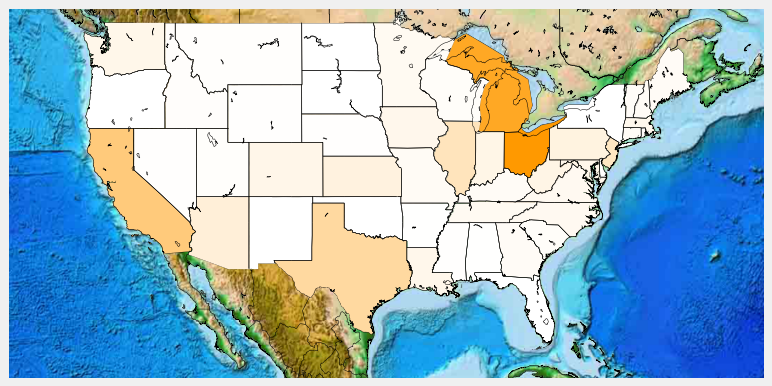

In [22]:
interact(plot_map, year= (a,b,1))